In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import glob
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf


%matplotlib inline

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

print(tf.__version__)
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1
2.3.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [39]:
# from os import listdir
# from os.path import isfile, join
# import shutil
# mypath = r"E:\stdies\Data_Science\q4\Adv CV\project\crop_code_data\frames"
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# len(onlyfiles)
# for i in onlyfiles:
#     for j in range(1,10):
#         if("W0"+str(j) in i):
#             shutil.copy(mypath+'/'+i, "E://stdies//Data_Science//q4//Adv CV//project//crop_code_data//data//word"+str(j)+"//" )

# DATASET GENERATION

Group by subjects

In [8]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# image = cv2.imread("E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample/S01_W05_U01_F001.jpg")

# plt.imshow(image)

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# plt.imshow(gray)

# print(image.shape)
# print(gray.shape)

### Final groupby words

# Reshaping data

In [60]:
from numpy import savez_compressed

finalImages = np.array(finalwords)
print(len(finalImages))
print(finalImages.shape)

savez_compressed('578newwordsdata.npz', finalImages) # Save numpy arrays

1680
(1680, 10, 24, 48, 3)


In [9]:
sample = []
testdata = []
#finalImages[0].shape
for i in finalImages:
    #print(len(i))
    sample.append(len(i))
    lenn = len(i)
    if(lenn == 4):
        #for j in i:
        testdata.append(i)
        

#print((sample))
#print(max(sample))
size = []
for i in sample:
    if(i == 15):
        size.append(i)

print(len(size))

#testdata
# finalImages2 = np.array(testdata)
# finalImages2.shape
testdata

0


[]

In [97]:
# load numpy array from npz file
from numpy import load
dd = load('1210wwordsdata.npz')
finalImages = dd['arr_0']
print(finalImages.shape)

(1680, 10, 24, 48, 3)


In [58]:
def modifyFrames(frames):
    final = []
    length = len(frames)
    #print(length)
    #for i in range(0,length):
    length = len(frames)
    rem = length % 10
    r = round(rem/2)
   # print("frames length",length)
   # print("remainder ",rem)
   # print("rr ",r)
    if(length == 5 ):
        frames.extend([frames[length-1]]*3)
        frames.insert(0,frames[0])
        frames.insert(1,frames[0])
        final.append(frames)
    elif(length == 6):
        frames.extend([frames[length-1]]*3)
        frames.insert(0,frames[0])
        final.append(frames)
    elif(length == 7):
        frames.extend([frames[length-1]]*3)
        final.append(frames)
    elif(length == 8):
        frames.extend([frames[length-1]]*2)
        final.append(frames)
    elif(length == 9):
        frames.extend([frames[length-1]]*1)
        final.append(frames)
    elif(length == 10):
        final.append(frames)
    elif(length == 11):
         final.append(frames[r:r+10])
    elif(length == 12):
        final.append(frames[r:r+10])
    elif(length == 13):
        final.append(frames[r:r+10])
    elif(length == 14):
        final.append(frames[r:r+10])
    elif(length == 15):
        final.append(frames[r:r+10])
    elif(length == 16):
        final.append(frames[r:r+10])
    elif(length == 17):
        final.append(frames[r:r+10])
    elif(length == 18):
        final.append(frames[r:r+10])
    elif(length == 19):
        final.append(frames[r:r+10])
    elif(length == 20):
        final.append(frames[5:15])
    elif(length == 21):
        final.append(frames[5:15])
    elif(length == 22):
        final.append(frames[6:16])
    
    
    #print(len(final[0]))
    
    return final[0]

In [134]:
modifyFrames(['E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F1.jpg', 'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F2.jpg', 
              'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F3.jpg',
              'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F4.jpg', 
              'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F5.jpg', 
              'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F6.jpg', 
              'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F7.jpg', 
              'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F8.jpg',
              'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F9.jpg',
              'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F10.jpg',
              'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F11jpg',
              'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F12.jpg','E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F13.jpg'])




['E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F3.jpg',
 'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F4.jpg',
 'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F5.jpg',
 'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F6.jpg',
 'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F7.jpg',
 'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F8.jpg',
 'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F9.jpg',
 'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F10.jpg',
 'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F11jpg',
 'E:/stdies/Data_Science/q4/Adv CV/project/crop_code_data/sample\\S01_W07_U01_F12.jpg']

# Label Generation

In [5]:
#label=["Begin", "Choose", "Connection", "Navigation", "Next", "Previous", "Start", "Stop", "Hello", "Web"]
label = ["Begin","Choose","Web"]

finalLabels = label*560
for i in finalLabels:
     print(i)
# with open('sampleLabel.txt', 'r') as f:
#     label = [line.strip() for line in f]
# ssss = set()
# for i in label:
#     j = int(i)
#    ssss.add(j)
# ss

Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
Web
Begin
Choose
W

In [98]:
with open('sampleLabel.txt', 'r') as f:
    label = [line.strip() for line in f]
lb = LabelBinarizer()
labels = lb.fit_transform(label)
print(labels.shape)
finalLabels = np.array(labels)
finalLabels.shape

(1680, 3)


(1680, 3)

# Train test split

In [99]:
(trainX, testX, trainY, testY) = train_test_split(finalImages, finalLabels, test_size=0.30, random_state=50)

# trainX = np.array(trainX)
# trainY = np.array(trainY)
# testX = np.array(testX)
# testY = np.array(testY)
print("Train X records - ",len(trainX))
print("Train Y records - ",len(trainY))
print("Test X records - ",len(testX))
print("Test Y records - ",len(testY))

Train X records -  1176
Train Y records -  1176
Test X records -  504
Test Y records -  504


In [64]:
shapes = []
print(trainX[0].shape)
for i in trainX:
    #print(len(i))
    shapes.append(i.shape)
#shapes

(10, 24, 48, 3)


In [106]:
# flat_list = []
# for sublist in finalwords:
#     for item in sublist:
#         flat_list.append(item)

# newList = np.array(flat_list)

# labels = label*1548
# lb = LabelBinarizer()
# labels1 = lb.fit_transform(labels)
# newLabels = np.array(labels1)


# (trainX, testX, trainY, testY) = train_test_split(newList, newLabels, test_size=0.25, random_state=42)

# print("Train X records - ",len(trainX))
# print("Train Y records - ",len(trainY))
# print("Test X records - ",len(testX))
# print("Test Y records - ",len(testY))

# Train the model

In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, TimeDistributed,BatchNormalization,MaxPool2D, GlobalMaxPool2D


# from keras.layers import Conv2D, BatchNormalization,MaxPool2D, GlobalMaxPool2D, Flatten
# from keras.layers import TimeDistributed, GRU, LSTM,Dense, Dropout


In [66]:
def build_convnet(shape=(24, 48, 3)):
    momentum = .9
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape=shape,padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(momentum=momentum))
    
    model.add(tf.keras.layers.MaxPool2D())
    
    model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(momentum=momentum))
    
    model.add(tf.keras.layers.MaxPool2D())
    
    model.add(tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(momentum=momentum))
    
    model.add(tf.keras.layers.MaxPool2D())
    
    model.add(tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(momentum=momentum))
    
    model.add(tf.keras.layers.MaxPool2D())
    
    
    model.add(tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(momentum=momentum))
    
    
    # flatten...
    model.add(tf.keras.layers.Flatten())
    
    
    return model

In [70]:
def action_model(shapes , nbout=3):
    # Create our convnet with (112, 112, 3) input shape
    convnet = build_convnet(shapes[1:])
    print(convnet)
    print("convolution over")
    # then create our final model
    model = tf.keras.models.Sequential()
    # add the convnet with (5, 112, 112, 3) shape
    model.add(TimeDistributed(convnet, input_shape=shapes))
    print("Time distributed over")
    # here, you can also use GRU or LSTM
    model.add(tf.keras.layers.LSTM(100))
    # and finally, we make a decision network
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(.8))
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(.8))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(.7))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(.6))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(.5))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    print("Final dense layer")
    model.add(tf.keras.layers.Dense(nbout, activation='softmax'))
        
    return model

In [71]:
TimeDistmodel = action_model((10, 24, 48, 3),10)

convolution over
Time distributed over
Final dense layer


In [100]:
optimizer = tf.keras.optimizers.Adam(0.001)

TimeDistmodel.compile(
    optimizer,
    'categorical_crossentropy',
    metrics=['acc']
)

checkpoint_path = "training_1210/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


finalModel = TimeDistmodel.fit(trainX,trainY,epochs=100, validation_data=(testX,testY),callbacks=[cp_callback])


Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 1.7469 - acc: 0.5748
Epoch 00001: saving model to training_1210\cp.ckpt
37/37 [==============================] - 86s 2s/step - loss: 1.7469 - acc: 0.5748 - val_loss: 1.0462 - val_acc: 0.6171
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 0.8518 - acc: 0.6131
Epoch 00002: saving model to training_1210\cp.ckpt
37/37 [==============================] - 83s 2s/step - loss: 0.8518 - acc: 0.6131 - val_loss: 0.7754 - val_acc: 0.6409
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 0.6491 - acc: 0.6896
Epoch 00003: saving model to training_1210\cp.ckpt
37/37 [==============================] - 83s 2s/step - loss: 0.6491 - acc: 0.6896 - val_loss: 0.8197 - val_acc: 0.6528
Epoch 4/100
37/37 [==============================] - ETA: 0s - loss: 0.5917 - acc: 0.6811
Epoch 00004: saving model to training_1210\cp.ckpt
37/37 [==============================] - 84s 2s/step - loss: 0.5917 - acc: 0.68

37/37 [==============================] - 83s 2s/step - loss: 0.1375 - acc: 0.9575 - val_loss: 0.3638 - val_acc: 0.9365
Epoch 33/100
37/37 [==============================] - ETA: 0s - loss: 0.1199 - acc: 0.9702
Epoch 00033: saving model to training_1210\cp.ckpt
37/37 [==============================] - 83s 2s/step - loss: 0.1199 - acc: 0.9702 - val_loss: 0.2864 - val_acc: 0.9286
Epoch 34/100
37/37 [==============================] - ETA: 0s - loss: 0.1120 - acc: 0.9685
Epoch 00034: saving model to training_1210\cp.ckpt
37/37 [==============================] - 83s 2s/step - loss: 0.1120 - acc: 0.9685 - val_loss: 0.2186 - val_acc: 0.9306
Epoch 35/100
37/37 [==============================] - ETA: 0s - loss: 0.1029 - acc: 0.9702
Epoch 00035: saving model to training_1210\cp.ckpt
37/37 [==============================] - 84s 2s/step - loss: 0.1029 - acc: 0.9702 - val_loss: 0.1704 - val_acc: 0.9544
Epoch 36/100
37/37 [==============================] - ETA: 0s - loss: 0.1286 - acc: 0.9549
Epoch 0

Epoch 64/100
37/37 [==============================] - ETA: 0s - loss: 0.2788 - acc: 0.8988
Epoch 00064: saving model to training_1210\cp.ckpt
37/37 [==============================] - 84s 2s/step - loss: 0.2788 - acc: 0.8988 - val_loss: 0.2747 - val_acc: 0.9087
Epoch 65/100
37/37 [==============================] - ETA: 0s - loss: 0.1789 - acc: 0.9481
Epoch 00065: saving model to training_1210\cp.ckpt
37/37 [==============================] - 84s 2s/step - loss: 0.1789 - acc: 0.9481 - val_loss: 0.1525 - val_acc: 0.9504
Epoch 66/100
37/37 [==============================] - ETA: 0s - loss: 0.0939 - acc: 0.9762
Epoch 00066: saving model to training_1210\cp.ckpt
37/37 [==============================] - 85s 2s/step - loss: 0.0939 - acc: 0.9762 - val_loss: 0.1488 - val_acc: 0.9583
Epoch 67/100
37/37 [==============================] - ETA: 0s - loss: 0.0874 - acc: 0.9779
Epoch 00067: saving model to training_1210\cp.ckpt
37/37 [==============================] - 83s 2s/step - loss: 0.0874 - acc: 

37/37 [==============================] - 94s 3s/step - loss: 0.0389 - acc: 0.9949 - val_loss: 0.0730 - val_acc: 0.9841
Epoch 96/100
37/37 [==============================] - ETA: 0s - loss: 0.0277 - acc: 0.9949
Epoch 00096: saving model to training_1210\cp.ckpt
37/37 [==============================] - 92s 2s/step - loss: 0.0277 - acc: 0.9949 - val_loss: 0.0709 - val_acc: 0.9861
Epoch 97/100
37/37 [==============================] - ETA: 0s - loss: 0.0401 - acc: 0.9915
Epoch 00097: saving model to training_1210\cp.ckpt
37/37 [==============================] - 90s 2s/step - loss: 0.0401 - acc: 0.9915 - val_loss: 0.0987 - val_acc: 0.9841
Epoch 98/100
37/37 [==============================] - ETA: 0s - loss: 0.0263 - acc: 0.9940
Epoch 00098: saving model to training_1210\cp.ckpt
37/37 [==============================] - 85s 2s/step - loss: 0.0263 - acc: 0.9940 - val_loss: 0.0748 - val_acc: 0.9821
Epoch 99/100
37/37 [==============================] - ETA: 0s - loss: 0.0213 - acc: 0.9957
Epoch 0

In [101]:
#test_loss, test_accuracy = TimeDistmodel.evaluate(testX, testY)

In [102]:
TimeDistmodel.save("1210model.h5")

In [2]:
history = tf.keras.models.load_model("1210model.h5")

history.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_2 (TimeDist (None, 10, 1536)          5870400   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               654800    
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              103424    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)              

# Prediction

In [3]:
def loadData():
    filestest = glob.glob ("C:/Users/Shyamprasad/Desktop/CV/Test/Code/webcam_test/1210/*")
    test = []
    mainlist = []
    final = []
    for i in filestest:
        read = cv2.imread(i)
        test.append(read)
        
        
#         if(l==10):
#             mainlist.append(test)
#     print(len(mainlist[0]))
    #print((test[0:10]))
    l = len(test)
    for i in [test]:
        q = int(l/10)
        t = 0
        for j in range(0,q):
            
            mainlist.append(test[t:t+10])
            t=t+10
    
    for j in mainlist:
        testnp = np.array(j)
        x = np.expand_dims(testnp, axis=0)
        print(x.shape)
        final.append(x)
    
    return final

In [6]:


data = loadData()


print(len(data))


for i in data:
    predictions = history.predict(i)


    print(label[np.argmax(predictions)])

    for i in predictions:

        print(i)
        print(max(i))



(1, 10, 24, 48, 3)
(1, 10, 24, 48, 3)
(1, 10, 24, 48, 3)
(1, 10, 24, 48, 3)
4
Begin
[1.0000000e+00 1.5142235e-13 1.2382966e-24]
1.0
Web
[3.0120655e-21 3.5622684e-04 9.9964380e-01]
0.9996438
Begin
[1.0000000e+00 2.8604547e-28 0.0000000e+00]
1.0
Choose
[0.04076644 0.94358844 0.01564513]
0.94358844


In [111]:
# tf.math.confusion_matrix(
#     label, predictions, num_classes=None, weights=None, dtype=tf.dtypes.int32,
#     name=None
# )


#confusion = tf.math.confusion_matrix(labels=label, predictions=predictions, num_classes=3)

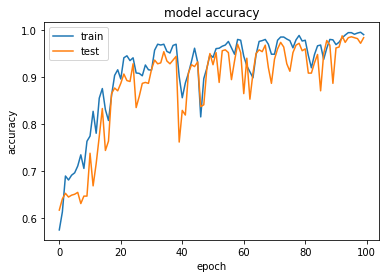

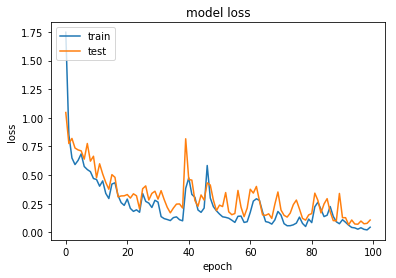

In [110]:
import matplotlib.pyplot as plt 

plt.plot(finalModel.history['acc'])
plt.plot(finalModel.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(finalModel.history['loss'])
plt.plot(finalModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()